# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>  
## <span style="color:blue"> Numerical Exercises 1 </span>  

The aim of this notebook is to assess the performance of the random number generator (downloaded from the NSL Ariel web site) and to apply it to selected problems in probability and statistics.  
Specifically, we compute the first two moments of the uniform distribution, verify both the Central Limit Theorem and its generalized form, and simulate Buffon’s experiment.  

The notebook is organized into three main sections:  

1.1 [Estimation of the mean value, variance, and $\chi^2$ distribution](#11-estimation-of-the-mean-value-variance-and-$\chi^2$-distribution)  

1.2 [Verification of the generalized Central Limit Theorem](#12-verification-of-the-generalized-central-limit-theorem)  

1.3 [Simulation of Buffon’s experiment](#13-simulation-of-buffons-experiment)  


In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math


## 1.1 Estimation of the mean value, variance, and $\chi^2$ distribution
### Mean value

The mean value of the uniform distribution in $[0,1]$ can be obtained analytically as:


$$\langle r \rangle = \int_0^1 r \, dr = \frac{1}{2}. $$


We now aim to estimate this quantity by means of a statistical computation, using the random number generator.  
Since the estimate is based on a finite sample, the result is affected by statistical fluctuations, and its accuracy depends on the number of extracted values and on the error analysis.

From a computational point of view, the mean value is estimated from a finite sample $\{r_i\}_{i=1}^M$ of uniformly distributed random numbers as  

$$ \overline{r}_M = \frac{1}{M} \sum_{i=1}^M r_i .$$

To evaluate the statistical uncertainty on this estimate, we employ the **blocking method**.  
The $M$ data points are divided into $N$ blocks, each containing $L = M/N$ values.  
For each block $k$ we compute the block average  

$$ \overline{r}_k = \frac{1}{L} \sum_{i=(k-1)L+1}^{kL} r_i ,$$

and from the collection of block averages we construct the progressive mean  

$$ \langle \overline{r} \rangle_n = \frac{1}{n} \sum_{k=1}^n \overline{r}_k , \quad n=1,2,\dots,N,$$

together with its statistical uncertainty estimated as  

$$ \sigma_n = \sqrt{\frac{\langle \overline{r}^2 \rangle_n - \langle \overline{r} \rangle_n^2}{\,n-1\,}} .$$

This procedure allows us to monitor the convergence of the sample mean to the exact value $1/2$, while keeping track of the associated error as the number of blocks increases.

I computed $\langle r \rangle$ using $M = 10^5$ random numbers divided into $N = 100$ blocks.  
The following figure shows the behavior of the progressive mean and the corresponding statistical uncertainty as a function of the number of throws.  
For clarity, the plot reports the deviation of the estimated mean from the theoretical value.








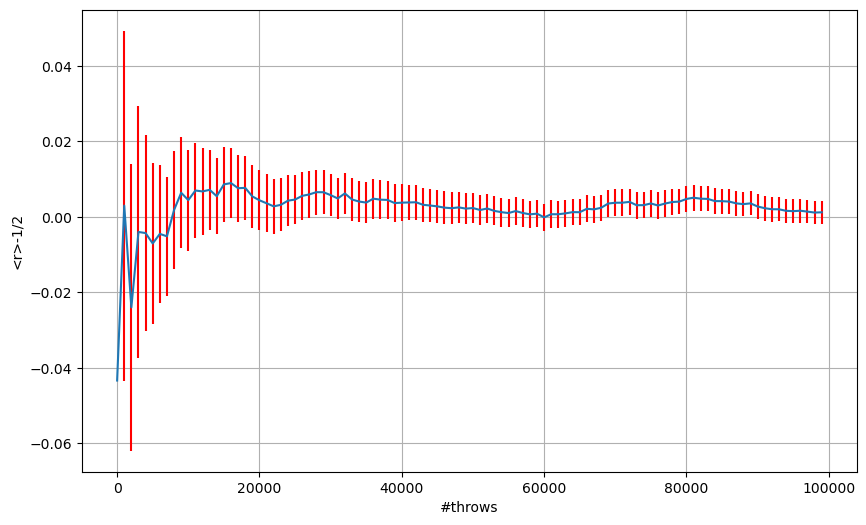

In [2]:
medie = np.loadtxt('main_1_1/output_medie.txt')
errori=np.loadtxt('main_1_1/output_errori.txt')
M=100000
N=100
L= M/N
x = np.arange(N)  
x= x*L
#plt.plot(x,medie-0.5)
plt.figure(figsize=(10,6))
plt.errorbar(x,medie-0.5,yerr=errori, ecolor='red')
plt.xlabel('#throws')
plt.ylabel('<r>-1/2')
plt.grid(True)
plt.show()

**Figure 1.** Progressive estimate of the mean value of the uniform distribution with $M = 10^5$ samples divided into $N = 100$ blocks. The plot reports the deviation of the estimated mean from the theoretical value $1/2$, together with the associated statistical uncertainty.



The progressive mean approaches the expected value $1/2$ as the number of throws increases, since the deviation $\langle r \rangle - 1/2$ tends to zero, with deviations of the order of one standard error.  
At the same time, the statistical fluctuations decrease as the number of blocks $N$ increases (for fixed $M$), , because the error can be estimated only by comparing the results of multiple independent blocks.  
This confirms the effectiveness of the blocking method and the validity of the random number generator.




### Variance

Similarly to the previous case, we now compute the variance of the uniform distribution using the same procedure.

The variance is :
$$\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12 .$$

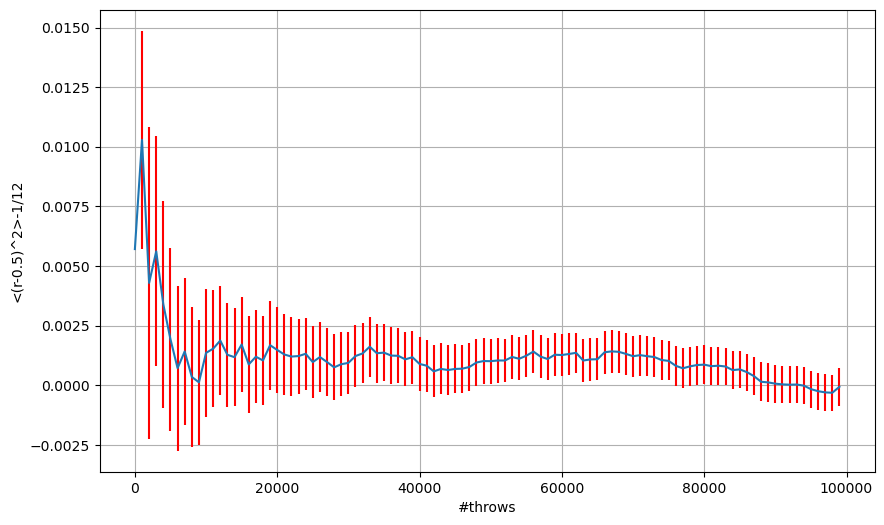

In [3]:
medie_var = np.loadtxt('main_1_1/output_var_medie.txt')
errori_var=np.loadtxt('main_1_1/output_errori_var.txt')

l=1/12
plt.figure(figsize=(10,6))
plt.errorbar(x,medie_var-l,yerr=errori_var, ecolor='red')
plt.xlabel('#throws')
plt.ylabel('<(r-0.5)^2>-1/12')
plt.grid(True)
plt.show()

**Figure 2.** Progressive estimate of the variance of the uniform distribution with $M = 10^5$ samples divided into $N = 100$ blocks. The plot reports the deviation of the estimated variance from the theoretical value $1/12$, together with the associated statistical uncertainty.



The progressive estimate approaches the theoretical value $1/12$ as the number of throws increases, since $\langle (r-1/2)^2 \rangle -1/12 $ tends to zero, with deviations of the order of one standard error.  
The statistical fluctuations decrease as the number of blocks $N$ increases (for fixed $M$), showing the same behavior already observed in **Figure 1**.  
This confirms the effectiveness of the blocking method and the validity of the random number generator.



### $\chi^2$ distribution

The quality of the random number generator can be tested through the **Pearson $\chi^2$ statistic**, which measures the discrepancy between the observed frequencies of events and the expected ones under a given hypothesis.  
Pearson's cumulative test statistic $\chi^2$ is a measure of the error between observations, $O_i$, and expected values, $E_i$:
$$\chi^2 = \sum_{i} \frac{\left( O_i - E_i \right)^2}{E_i}$$

In this case, the null hypothesis is that the random numbers $r$ are **not** drawn from a uniform distribution in $[0,1]$. If this probability is low, then we can safely reject this last hypothesis.  

To test this, the interval $[0,1]$ is divided into $M$ equal sub-intervals, and for each of them we compare the number of occurrences $n_i$ with the expected value $n/M$, where $n$ is the total number of generated samples. The test statistic is  

$$
\chi^2 = \sum_{i=1}^M \frac{(n_i - n/M)^2}{n/M}.
$$

The denominator $E_i = n/M$ comes from the fact that the number of hits in each bin follows a **Binomial distribution** with parameters $(n, p=1/M)$.  
For a Binomial distribution, the mean is $\langle X \rangle = np$ and the variance is $\sigma^2 = np(1-p) \simeq np$ when $p$ is small.  
Thus, in our case $\langle n_i \rangle = n/M$ and $\sigma^2(n_i) \simeq n/M$, which explains why the variance of the fluctuations is compared with $E_i$ in the definition of $\chi^2$.  

If the numbers are truly uniform, $\chi^2$ follows a $\chi^2$ distribution with $M-1$ degrees of freedom.  
Its expectation value is therefore $\langle \chi^2 \rangle = M-1$, while the standard deviation is $\sigma(\chi^2) = \sqrt{2(M-1)}$.  

In the present study, we use $M=100$ bins and compute $\chi^2$ by grouping the random numbers into blocks of $n = 10^4$ values. This provides a set of $\chi^2_j$ values (with $j=1,\dots,100$) that can be compared with the theoretical $\chi^2$ distribution.  


In [4]:
chi_values = np.loadtxt("main_1_1/chiquadro.txt")
print(f"Mean value of empirical χ² = {chi_values.mean():.3f}")
print(f"Standard deviation of empirical χ² = {chi_values.std():.3f}")

Mean value of empirical χ² = 99.914
Standard deviation of empirical χ² = 13.882


The empirical distribution of the $\chi^2$ statistics, obtained from 100 repetitions, has mean value $\langle \chi^2 \rangle_{\text{emp}} = 99.914$ and standard deviation $\sigma_{\text{emp}} = 13.882$.  
These values are in excellent agreement with the theoretical expectation for a $\chi^2$ distribution with 99 degrees of freedom,  
namely $\langle \chi^2 \rangle = 99$ and $\sigma = \sqrt{2 \cdot 99} \approx 14.07$.  
Therefore, there is no statistical support for the null hypothesis (*the data are not uniformly distributed*), which can be safely rejected.


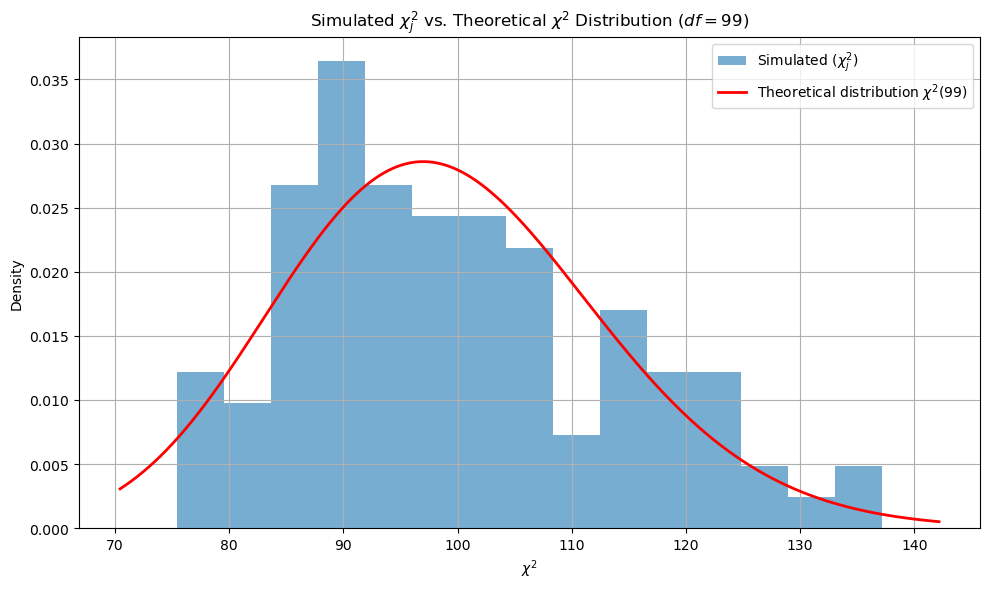

In [5]:
from scipy.stats import chi2




# Parametri teorici
df = 99  # gradi di libertà
x = np.linspace(min(chi_values) - 5, max(chi_values) + 5, 1000)
pdf = chi2.pdf(x, df)

# Plot
plt.figure(figsize=(10,6))
plt.hist(chi_values, bins=15, density=True, alpha=0.6, label='Simulated ($\chi^2_j$)')
plt.plot(x, pdf, 'r-', lw=2, label=r'Theoretical distribution $\chi^2(99)$')

# Annotazioni
plt.title(r"Simulated $\chi^2_j$ vs. Theoretical $\chi^2$ Distribution ($df = 99$)")
plt.xlabel(r"$\chi^2$")
plt.ylabel("Density")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

**Figure 3.** Histogram of the simulated $\chi^2_j$ values (blue) compared with the theoretical $\chi^2$ distribution with $99$ degrees of freedom (red curve).  
The empirical distribution is obtained from $100$ independent $\chi^2$ tests, each based on $10^4$ pseudo-random numbers uniformly generated in $[0,1]$ and binned into $M=100$ sub-intervals.



The figure 3 shows that the histogram of the simulated values qualitatively follows the shape of the theoretical $\chi^2$ distribution, with the expected asymmetry and right tail. However, the peak of the histogram is centered around $\chi^2 \approx 90$, slightly below the theoretical expectation $\langle \chi^2 \rangle = 99$.  
This deviation can be attributed both to statistical fluctuations due to the finite number of tests (100), and to the pseudo-random nature of the generated numbers, which may enforce a distribution slightly more uniform than expected, thus reducing the variance of the statistic.  

Overall, the agreement with the theoretical distribution is satisfactory. No strong evidence supports the null hypothesis as formulated in the assignment (*the data are not drawn from a uniform distribution*). We can therefore reject this hypothesis and conclude that, within the limits of the present analysis, the pseudo-random numbers are consistent with an independent uniform distribution on $[0,1]$.


## 1.2 Verification of the generalized Central Limit Theorem

Let $X_1, X_2, \dots, X_N$ be i.i.d. random variables and define their partial sum as  
$$ S_N = \sum_{i=1}^N X_i $$  
with corresponding sample mean  
$$ \overline{X}_N = \frac{S_N}{N} .$$

**Central Limit Theorem (finite variance).**  
If the $X_i$ have finite mean $\mu$ and variance $\sigma^2$, then  
$$ \sqrt{N}\,(\overline{X}_N - \mu) \;\;\Rightarrow\;\; \mathcal{N}(0,\sigma^2) \quad \text{as } N \to \infty .$$  
Therefore, for sufficiently large $N$, the distribution of $\overline{X}_N$ is approximately Gaussian with mean $\mu$ and variance $\sigma^2/N$.

**Generalized Central Limit Theorem (stable laws).**  
If the $X_i$ follow a heavy-tailed distribution in the domain of attraction of a stable law with stability index $\alpha \in (0,2)$, then the normalized sum $S_N$ converges to an $\alpha$-stable distribution.  
In particular, for the **Cauchy–Lorentz** case ($\alpha = 1$), $X_i \sim \mathrm{Cauchy}(x_0,\gamma)$ is already a stable law: the average $\overline{X}_N$ has the same distribution $\mathrm{Cauchy}(x_0,\gamma)$ for all $N$.  
Thus, unlike the finite-variance case, the distribution of $\overline{X}_N$ does **not** collapse to a Gaussian and retains the heavy tails of the Cauchy distribution.

### Distributions considered and sampling

We generate the random variables $X_i$ according to:  

- **Uniform distribution $U(0,1)$**   

- **Exponential distribution with $\lambda=1$:**  
  probability density function  
  $$ f(x) = \lambda e^{-\lambda x}, \quad x \geq 0, $$  
  with mean $\mu = 1/\lambda = 1$ and variance $\sigma^2 = 1/\lambda^2 = 1$.  

- **Cauchy–Lorentz distribution with $x_0=0$ and $\gamma=1$:**  
  probability density function  
  $$ f(x) = \frac{1}{\pi}\,\frac{\gamma}{(x-x_0)^2 + \gamma^2}, $$  
  with undefined mean and variance.  

All non-uniform samples are generated by applying the **inverse transform method** to uniform random numbers.  

### What we test in the plots

We study the distribution of $\overline{X}_N$ for $N=\{1,2,10,100\}$ over $10^4$ independent realizations:  

- For **Uniform** and **Exponential**, histograms of $\overline{X}_N$ approach a Gaussian centered at $\mu$, with width scaling as $1/\sqrt{N}$.  
- For **Cauchy–Lorentz**, histograms of $\overline{X}_N$ remain unchanged and distributed as Cauchy $(x_0,\gamma)$ , showing no concentration around a mean value.


In [15]:

from scipy.stats import norm, cauchy

def plot_means_grid(file_prefix, Ns=(1,2,10,100), bins=50, range_=None,
                    title="", fit_only_for_N=100):
    fig, axs = plt.subplots(2, 2, figsize=(10, 8))
    fig.suptitle(title, fontsize=14)
    axs = axs.ravel()

    for ax, N in zip(axs, Ns):
        data = np.loadtxt(f"{file_prefix}_{N}.txt")
        ax.hist(data, bins=bins, density=True, range=range_,
                edgecolor="black", alpha=0.7, label="Data")

        if N == fit_only_for_N:
            # fit gaussiano
            mu, sigma = norm.fit(data)
            x = np.linspace(range_[0], range_[1], 500) if range_ else np.linspace(min(data), max(data), 500)
            ax.plot(x, norm.pdf(x, mu, sigma), "r-", lw=2,
                    label=fr"Fit: $\mu$={mu:.3f}, $\sigma$={sigma:.3f}")

            fig.text(0.5, 0.01, f"Gaussian Fit  N={N}: μ={mu:.3f}, σ={sigma:.3f}", 
            ha="center", fontsize=12)

            ax.legend(frameon=False)

        ax.set_title(f"N = {N}")
        ax.set_xlabel(r"$S_N$")
        ax.grid(True, alpha=0.3)

    axs[0].set_ylabel("Density")
    axs[2].set_ylabel("Density")
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()



def plot_cauchy(file_prefix, Ns=(1,2,10,100), bins=50, range_=(-10,10),
                    title="", fit_only_for_N=100):
    fig, axs = plt.subplots(2, 2, figsize=(10, 8))
    fig.suptitle(title, fontsize=14)
    axs = axs.ravel()

    for ax, N in zip(axs, Ns):
        data = np.loadtxt(f"{file_prefix}_{N}.txt")
        ax.hist(data, bins=bins, density=True, range=range_,
                edgecolor="black", alpha=0.7, label="Dati")

        if N == fit_only_for_N:
            # fit Cauchy-Lorentz
            x0, gamma = cauchy.fit(data)   # loc=x0, scale=gamma
            x = np.linspace(range_[0], range_[1], 500) if range_ else np.linspace(min(data), max(data), 500)
            ax.plot(x, cauchy.pdf(x, loc=x0, scale=gamma), "r-", lw=2,
                    label=fr"Fit: $x_0$={x0:.3f},  $\gamma$={gamma:.3f}")

            # scrivi parametri sotto la figura
            fig.text(0.5, 0.004, f"Cauchy Fit N={N}: $x_0$={x0:.3f}, $\gamma$={gamma:.3f}", 
                     ha="center", fontsize=12)

            ax.legend(loc="upper left",bbox_to_anchor=(0.0, 0.99),frameon=False, fontsize=8)

        ax.set_title(f"N = {N}")
        ax.set_xlabel(r"$S_N$")
        ax.grid(True, alpha=0.3)

    axs[0].set_ylabel("Density")
    axs[2].set_ylabel("Density")
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


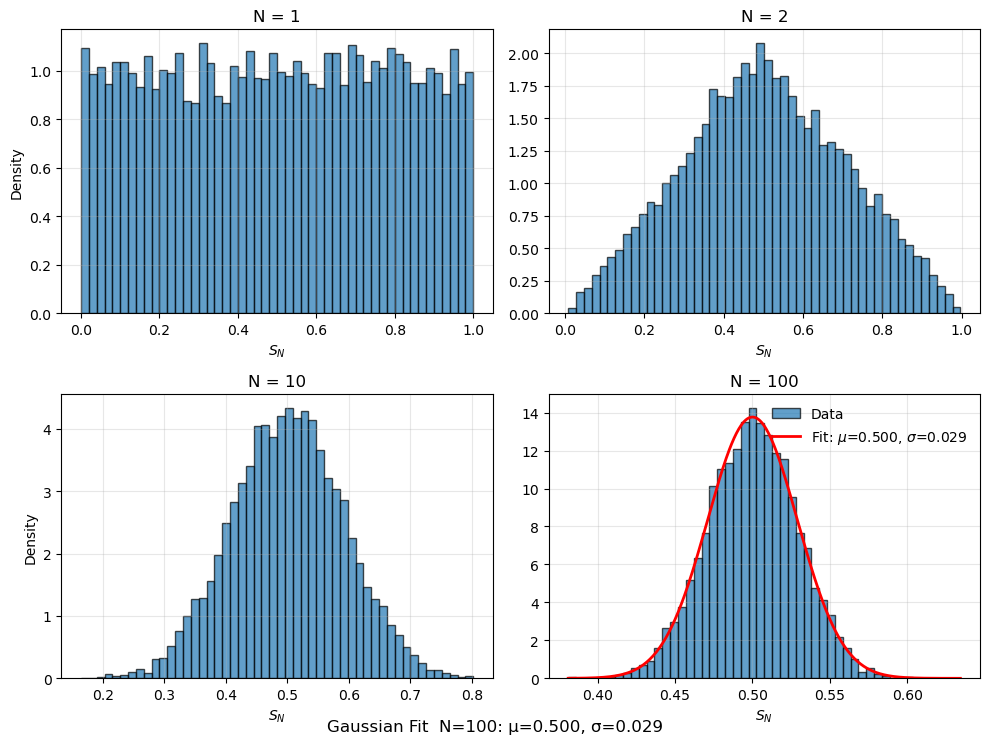

In [16]:
plot_means_grid("main_1_2/distrib_uniforme", Ns=(1,2,10,100), bins=50, range_=None,
                    title="", fit_only_for_N=100)


**Figure 4.** Histograms of the sample mean $S_N$ for the uniform distribution $U(0,1)$ with $N=1,2,10,100$.  
As $N$ increases, the distributions become progressively Gaussian and concentrate around the theoretical mean $\mu=0.5$, with variance shrinking as $1/N$.


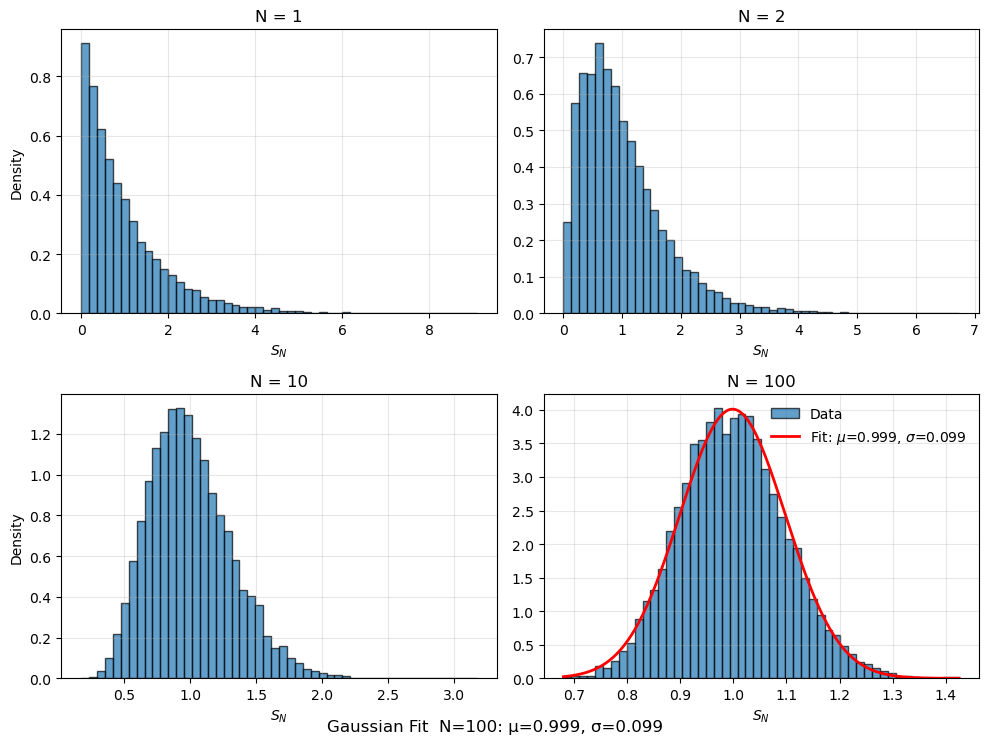

In [17]:
plot_means_grid("main_1_2/distrib_exp", Ns=(1,2,10,100), bins=50, range_=None,
                    title="", fit_only_for_N=100)


**Figure 5.** Histograms of the sample mean $S_N$ for the exponential distribution with $\lambda=1$, for $N=1,2,10,100$.  
The initially skewed distribution becomes increasingly symmetric and Gaussian as $N$ grows, with mean converging to $\mu=1$ and variance scaling as $1/N$.


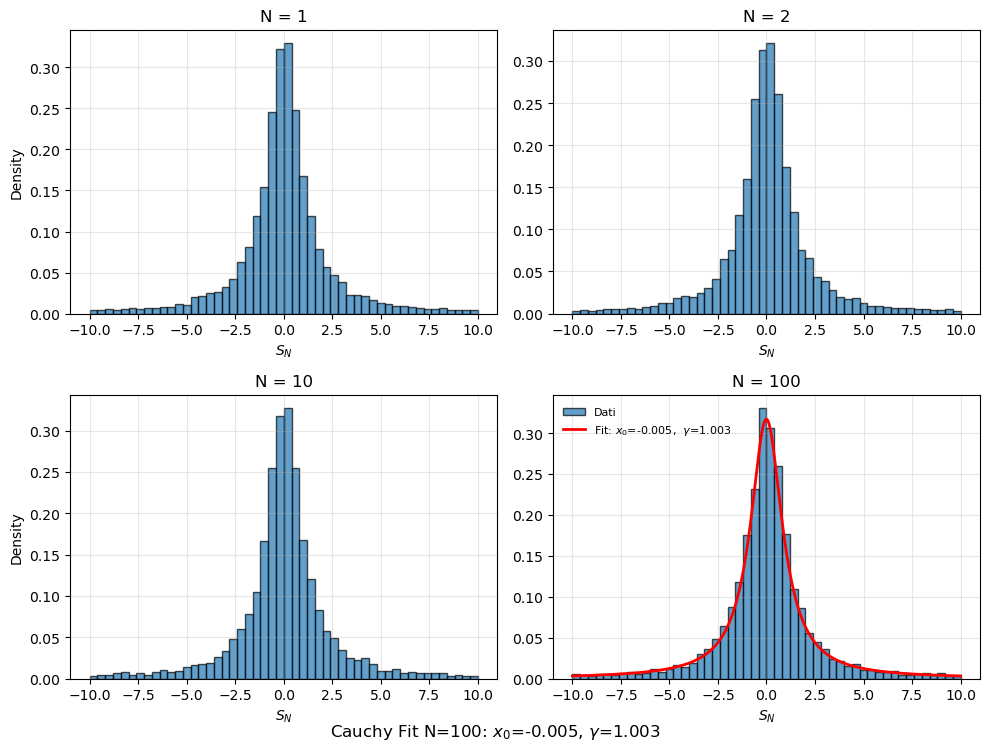

In [18]:

plot_cauchy("main_1_2/distrib_cl", Ns=(1,2,10,100), bins=50, range_=(-10,10),
                    title="", fit_only_for_N=100)

**Figure 6.** Histograms of the sample mean $S_N$ for the Cauchy–Lorentz distribution with $x_0=0$ and $\gamma=1$, for $N=1,2,10,100$.  
Independently of $N$, the distributions retain the same heavy-tailed shape, in agreement with the generalized CLT: $ S_N $ remains Cauchy $(0,1)$ and does not converge to a Gaussian.


These results confirm the Central Limit Theorem and its generalization.  
For distributions with finite variance (uniform and exponential), the sample mean converges towards a Gaussian distribution centered at the theoretical mean, with decreasing variance as $N$ increases.  
In contrast, for the Cauchy–Lorentz distribution, the heavy tails persist at all values of $N$ and the distribution of the sample mean remains unchanged.  
This highlights the fundamental difference between finite-variance and stable heavy-tailed laws, illustrating both the power and the limitations of the Central Limit Theorem.


## 1.3 Simulation of Buffon’s experiment




Buffon’s needle is a classical Monte Carlo method to estimate $\pi$.  
A needle of length $\ell$ is dropped on a plane ruled with parallel lines at distance $d$ (with $\ell \le d$).  
Let $N_{\text{hit}}$ be the number of crossings out of $M$ throws. The intersection probability is
$P = \dfrac{2\ell}{\pi d}$, hence a consistent estimator of $\pi$ is
$$
\widehat{\pi} \;=\; \frac{2\ell}{d\,\widehat{P}}, 
\qquad 
\widehat{P} \;=\; \frac{N_{\text{hit}}}{M}.
$$

### Simulation technique

For each throw we sample:
1. **Distance of the needle’s center from the nearest line**  
   $$r \sim U(0,\, d/2).$$  
   

2. **Orientation** via an **isotropic Gaussian vector**  
   Generate $(X,Y)$ with independent $X,Y \sim \mathcal N(0,1)$.  
   By rotational invariance, the direction of $(X,Y)$ is uniformly distributed on the circle.  
   We can avoid trigonometric angles and compute
   $$
   s \;=\; |\sin\theta| \;=\; \frac{|Y|}{\sqrt{X^2+Y^2}} \in [0,1].
   $$
   

3. **Hit test (crossing condition)**  
   The needle crosses a line iff
   $$
   r \;\le\; \frac{\ell}{2}\, s .
   $$
   If true, increment $N_{\text{hit}}$.

After $M$ throws we form $\widehat{P}=N_{\text{hit}}/M$ and $\widehat{\pi}=2\ell/(d\,\widehat{P})$.  

### Error estimation via block averages

To quantify statistical uncertainty, we apply the **blocking method** (same convention as Sec. 1.1):  
split the $M$ throws into $N$ blocks of size $m=M/N$. For each block $k=1,\dots,N$,
- count $N_{\text{hit}}^{(k)}$ and compute the block estimator
  $$
  \widehat{\pi}_k \;=\; \frac{2\ell}{d}\,\frac{m}{N_{\text{hit}}^{(k)}} \quad (\text{if } N_{\text{hit}}^{(k)}>0).
  $$
- build the progressive mean and its standard error:
  $$
  \langle \widehat{\pi} \rangle_n = \frac{1}{n}\sum_{k=1}^n \widehat{\pi}_k,\qquad
  \sigma_n = \sqrt{\frac{\langle \widehat{\pi}^2 \rangle_n - \langle \widehat{\pi} \rangle_n^2}{\,n-1\,}},
  \quad n=1,\dots,N.
  $$

This procedure yields the progressive estimate of $\pi$ with reliable error bars, while the Gaussian-vector sampling guarantees a truly uniform orientation of the needle.


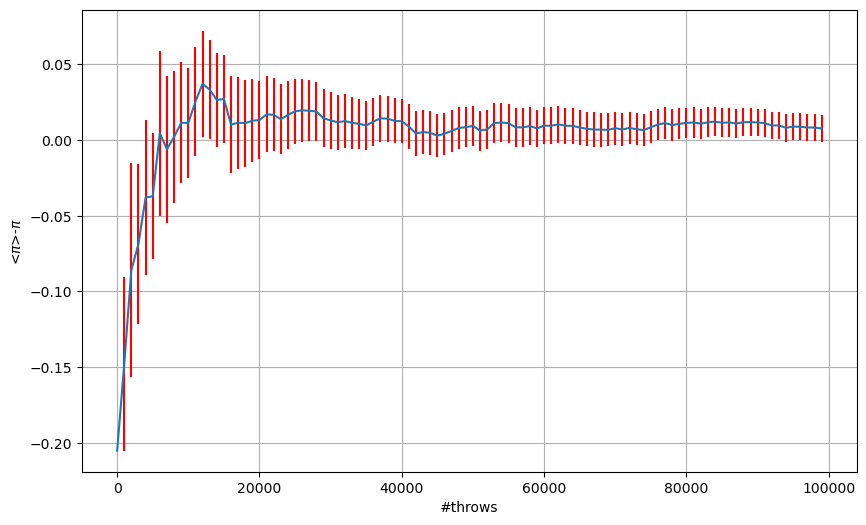

In [10]:

medie = np.loadtxt('main_1_3/medie_prog.txt')
errori=np.loadtxt('main_1_3/errori.txt')
M=100000
N=100
L= M/N
x = np.arange(N)  
x= x*L
plt.figure(figsize=(10,6))
plt.errorbar(x,medie-math.pi,yerr=errori, ecolor='red')
plt.xlabel('#throws')
plt.ylabel(f'<$\pi$>-$\pi$')
plt.grid(True)
plt.show()

**Figure 7.** Progressive estimate of $\pi$ obtained from Buffon’s needle experiment with $M=10^5$ throws divided into blocks.  
The plot shows the deviation of the block-averaged estimate from the exact value of $\pi$, together with statistical error bars.


The progressive estimate of $\pi$ approaches the theoretical value within one standard error as the number of throws increases, since the deviation $\widehat{\pi}-\pi_{\text{theory}}$ tends to zero.  
The statistical behavior is the same as observed in Figures 1 and 2, and provides another confirmation of the validity of the Monte Carlo approach and of the correctness of the random sampling procedure.

